In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns

In [2]:
data = pd.read_csv('log2.csv')
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [3]:
label_encoder = preprocessing.LabelEncoder() 
  
data['Action']= label_encoder.fit_transform(data['Action']) 

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.00410758 -0.54874891 -0.65779368 ...  0.03860065 -0.008746
  -0.02077207]
 [ 0.75810782 -0.54864056 -0.87840622 ... -0.2140437  -0.01182699
  -0.02577167]
 [ 0.00410758 -0.56987603  1.35874068 ... -0.11687279 -0.01126681
  -0.02452177]
 ...
 [-0.88185253 -0.54874891 -0.5945663  ... -0.15898018 -0.00790573
  -0.02077207]
 [ 0.48389612 -0.54874891  0.21012511 ... -0.16545824 -0.00902609
  -0.02202197]
 [ 0.46672101 -0.56987603  2.08230243 ... -0.11363376 -0.01182699
  -0.02535504]]
[[ 0.12708658  2.90223129 -0.87840622 ... -0.2140437  -0.01182699
  -0.02577167]
 [ 0.03767115 -0.54874891 -0.55015226 ...  0.07422998 -0.00958627
  -0.02202197]
 [ 0.96335688 -0.56987603  0.35808083 ... -0.11687279 -0.01182699
  -0.02535504]
 ...
 [-0.70387386 -0.54874891 -0.4912524  ...  0.71555794 -0.00790573
  -0.01702237]
 [ 1.00354138 -0.56987603  1.95712315 ... -0.12011182 -0.01182699
  -0.02535504]
 [-1.03780511  1.85670954 -0.87840622 ... -0.2140437  -0.01182699
  -0.02577167]]


In [7]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier  # Example model, replace with your model

# Initialize the model (replace with your model)
model = DecisionTreeClassifier()  

# Initialize k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Use 5 folds, shuffle data, set random state for reproducibility

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())


Cross-validation scores: [0.9983978  0.99740597 0.99839768 0.99694796 0.99740577]
Mean CV accuracy: 0.9977110361091259
Standard deviation of CV accuracy: 0.0005850924268271402


[[7543    2    0    0]
 [   0 2985    7    2]
 [   0    9 2553    0]
 [   0    1    0    5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7545
           1       1.00      1.00      1.00      2994
           2       1.00      1.00      1.00      2562
           3       0.71      0.83      0.77         6

    accuracy                           1.00     13107
   macro avg       0.93      0.96      0.94     13107
weighted avg       1.00      1.00      1.00     13107

0.9983978027008469


<Axes: >

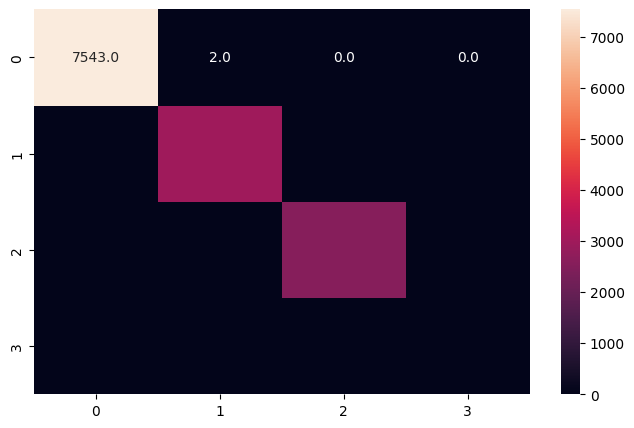

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
mat_conf = confusion_matrix(y_test, y_pred)
print(mat_conf)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
plt.figure( figsize = (8,5))
sns.heatmap(mat_conf, annot=True, fmt=".1f")